### Importing Libraries

In [2]:
import spotipy
#import credentials
from tqdm import tqdm_notebook as tqdm
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth
import pandas as pd
import requests 
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from math import pi

### Setting up API credentials

In [2]:
# You should create a credentials.py in your repo with credentials in it

In [3]:
client_credentials_manager = SpotifyClientCredentials(client_id=credentials.client_id,
                                                      client_secret=credentials.client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

### Examples of api usage

In [4]:
sp.user_playlists('11101312700')['items'][0]

{'collaborative': False,
 'description': '',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/39ATQymddYN7NyYh9o1wJt'},
 'href': 'https://api.spotify.com/v1/playlists/39ATQymddYN7NyYh9o1wJt',
 'id': '39ATQymddYN7NyYh9o1wJt',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab67616d0000b2738da11150ca82530050772584',
   'width': 640}],
 'name': 'to feel from outside this world',
 'owner': {'display_name': 'Tomás Ertola',
  'external_urls': {'spotify': 'https://open.spotify.com/user/11101312700'},
  'href': 'https://api.spotify.com/v1/users/11101312700',
  'id': '11101312700',
  'type': 'user',
  'uri': 'spotify:user:11101312700'},
 'primary_color': None,
 'public': True,
 'snapshot_id': 'NSxmMGE5ODQ5ODExY2RmMWEzMGMwYjE5Y2UwZTRiNmJhNTg2YzUzYTg1',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/39ATQymddYN7NyYh9o1wJt/tracks',
  'total': 3},
 'type': 'playlist',
 'uri': 'spotify:playlist:39ATQymddYN7NyYh9o1wJt'}

In [5]:
sp.playlist_tracks('39ATQymddYN7NyYh9o1wJt')['items'][0]

{'added_at': '2020-05-30T18:30:51Z',
 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/11101312700'},
  'href': 'https://api.spotify.com/v1/users/11101312700',
  'id': '11101312700',
  'type': 'user',
  'uri': 'spotify:user:11101312700'},
 'is_local': False,
 'primary_color': None,
 'track': {'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2wouN3QXejYa5tKetYdcVX'},
     'href': 'https://api.spotify.com/v1/artists/2wouN3QXejYa5tKetYdcVX',
     'id': '2wouN3QXejYa5tKetYdcVX',
     'name': 'Com Truise',
     'type': 'artist',
     'uri': 'spotify:artist:2wouN3QXejYa5tKetYdcVX'}],
   'available_markets': ['AD',
    'AE',
    'AL',
    'AR',
    'AT',
    'AU',
    'BA',
    'BE',
    'BG',
    'BH',
    'BO',
    'BR',
    'BY',
    'CA',
    'CH',
    'CL',
    'CO',
    'CR',
    'CY',
    'CZ',
    'DE',
    'DK',
    'DO',
    'DZ',
    'EC',
    'EE',
    'EG',
    'ES',
    'FI',
    'FR',
    'GB'

In [6]:
sp.audio_features('2kmX8QNMLg72Vy9Ux6mdmi')

[{'danceability': 0.526,
  'energy': 0.544,
  'key': 11,
  'loudness': -7.137,
  'mode': 1,
  'speechiness': 0.169,
  'acousticness': 0.258,
  'instrumentalness': 0.64,
  'liveness': 0.377,
  'valence': 0.544,
  'tempo': 170.37,
  'type': 'audio_features',
  'id': '2kmX8QNMLg72Vy9Ux6mdmi',
  'uri': 'spotify:track:2kmX8QNMLg72Vy9Ux6mdmi',
  'track_href': 'https://api.spotify.com/v1/tracks/2kmX8QNMLg72Vy9Ux6mdmi',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2kmX8QNMLg72Vy9Ux6mdmi',
  'duration_ms': 308400,
  'time_signature': 4}]

## Get all the data from our user id

In [7]:
def get_all_data(user_id):
    
    #get all the playlist id's
    
    track_list = []
    sname_list = []
    artist_list = []
    audio_ft = []
    
        
    for playlist in tqdm(sp.user_playlists(user_id)['items']):
            for idx,track in enumerate(sp.playlist_tracks(playlist['id'])['items']):
                if track['track']['id'] is not None:
                    
                    track_list.append(track['track']['id'])
                    sname_list.append(track['track']['name'])
                    artist_list.append(track['track']['album']['artists'][0])
                    #print(track['track']['id'])
                    audio_ft.append(sp.audio_features(track['track']['id'])[0])
    
    df = pd.DataFrame({'name': sname_list,
                       'artist': artist_list,
                       'id': track_list,
                       'audio_ft': audio_ft})
    
    return df

            

In [8]:
df = get_all_data('11101312700')

/home/tomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


In [9]:
# Time to transform the data in order to be clean

In [9]:
def transform_data(df):
    
    df['artist'] = df['artist'].apply(pd.Series)['name']
    
    df = pd.concat([df,df['audio_ft'].apply(pd.Series)], axis=1)
    
    df = df.drop(labels=['time_signature','duration_ms','analysis_url','track_href','type','audio_ft'], axis=1)
    
    return df
    
    
    

In [10]:
df = transform_data(df)

In [11]:
df.head()

,name,artist,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri
0,Brokendate,Com Truise,2kmX8QNMLg72Vy9Ux6mdmi,0.526,0.544,11,-7.137,1,0.1690,0.25800,0.640000,0.3770,0.544,170.370,2kmX8QNMLg72Vy9Ux6mdmi,spotify:track:2kmX8QNMLg72Vy9Ux6mdmi
1,Crimewave,Crystal Castles,3yQFmN8A5S8Kf1nUJuvb01,0.746,0.691,4,-7.533,0,0.0403,0.18400,0.025900,0.2050,0.888,119.982,3yQFmN8A5S8Kf1nUJuvb01,spotify:track:3yQFmN8A5S8Kf1nUJuvb01
2,Vanished,Crystal Castles,0exOxvY3iHsmAnGHiJYAZq,0.713,0.868,0,-6.644,0,0.0305,0.00206,0.000092,0.2250,0.641,119.980,0exOxvY3iHsmAnGHiJYAZq,spotify:track:0exOxvY3iHsmAnGHiJYAZq
3,Lady - Hear Me Tonight,Modjo,49X0LAl6faAusYq02PRAY6,0.720,0.808,6,-5.627,1,0.0379,0.00793,0.029300,0.0634,0.869,126.041,49X0LAl6faAusYq02PRAY6,spotify:track:49X0LAl6faAusYq02PRAY6
4,Baby I'm Yours,Breakbot,0tZkVZ9DeAa0MNK2gY5NtV,0.829,0.792,2,-3.755,0,0.0668,0.72600,0.000006,0.1220,0.758,118.050,0tZkVZ9DeAa0MNK2gY5NtV,spotify:track:0tZkVZ9DeAa0MNK2gY5NtV


Now we have all the songs of our playlist in a data frame with each audio feature, time to do some magic

In [12]:
features = ['danceability','energy','acousticness'
           ,'instrumentalness','valence']

### Scaling the data

In [13]:
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(df[features]))
scaled.columns = features

### Elbow method 

In [14]:
def calculate_wcss(data):
    wcss = []
    for n in range(1, 15):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

In [15]:
wcss = calculate_wcss(scaled)

Text(0, 0.5, 'SSE')

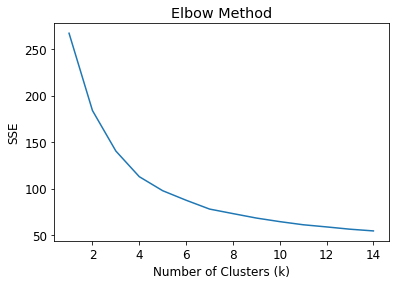

In [16]:
plt.rcParams.update({'font.size': 12})
plt.title('Elbow Method')
sns.lineplot(x=range(1,15), y=wcss, legend='brief')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')

In [17]:
kmeans = KMeans(n_clusters=4).fit(scaled)
y_kmeans = kmeans.predict(scaled)
centroids = kmeans.cluster_centers_
scaled = scaler.fit_transform(scaled)

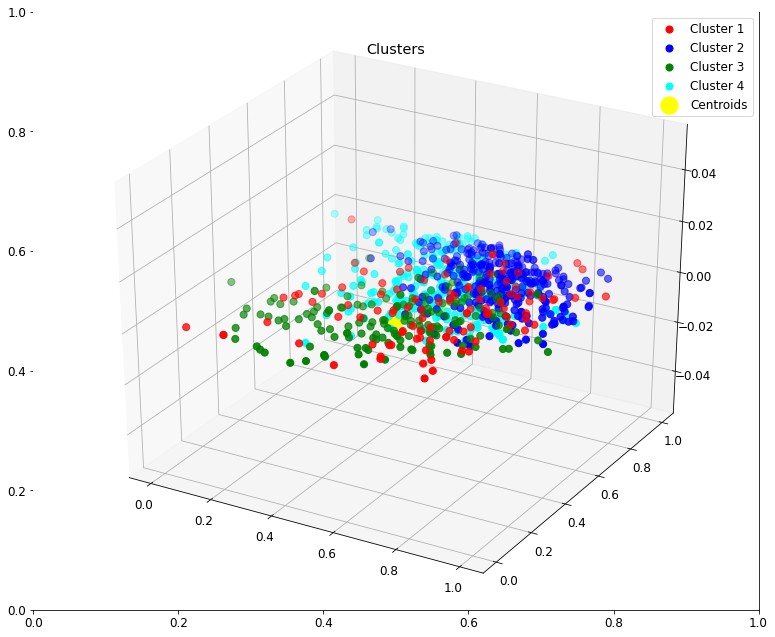

In [18]:

# visualizing clusters
fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(scaled[y_kmeans == 0,0],scaled[y_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans == 1,0], scaled[y_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(scaled[y_kmeans == 2,0], scaled[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(scaled[y_kmeans == 3,0], scaled[y_kmeans == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
#plt.scatter(scaled[y_kmeans == 4,0], scaled[y_kmeans == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')


# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.show()

In [19]:
kmeans_pred = pd.DataFrame(data=y_kmeans, dtype=int, columns=['k_cluster'])
kmeans_pred

,k_cluster
0,0
1,1
2,1
3,1
4,1
...,...
872,1
873,1
874,1
875,2


In [20]:
df_cluster = pd.concat([df, kmeans_pred], axis = 1)

In [46]:
df_cluster['k_cluster'].value_counts().index.to_list()

[1, 3, 2, 0]

In [48]:
cluster_stats = pd.DataFrame(columns=features)
for n in df_cluster['k_cluster'].value_counts().index.to_list():   
    cluster_stats = cluster_stats.append(df_cluster[df_cluster.k_cluster == n][features].mean(), ignore_index=True)
       

## Plotting the results

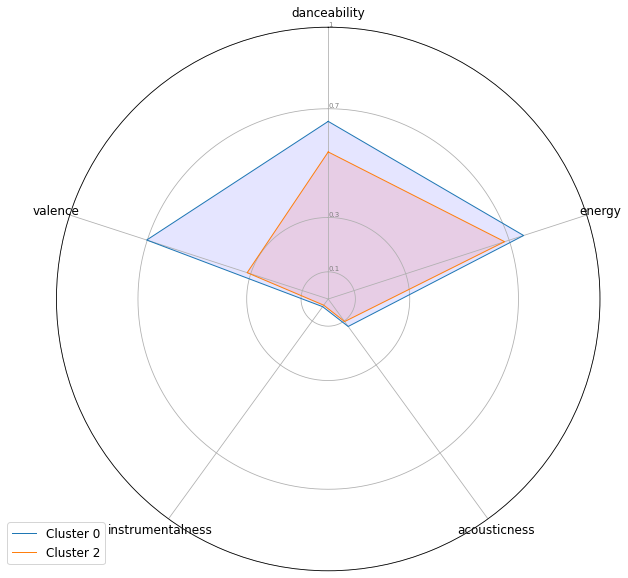

In [37]:
plt.figure(figsize=(10,10))
categories = list(cluster_stats)
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

ax = plt.subplot(111, polar=True)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], categories)

ax.set_rlabel_position(0)
plt.yticks([0.1, 0.3, 0.7,1], ["0.1","0.3","0.7", "1"], color='grey', size=7)
plt.ylim(0,1)


values = cluster_stats.loc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1,linestyle='solid', label='Cluster 0')
ax.fill(angles, values, 'b', alpha=0.1)

values = cluster_stats.loc[3].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1,linestyle='solid', label='Cluster 2')
ax.fill(angles, values, 'r', alpha=0.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1,0.1))


In [38]:
def make_spider(row, title, color):
    #number of variable
    
    categories=list(cluster_stats)
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    #initialize spider
    ax = plt.subplot(2,2,row+1,polar=True)
    
    ax.set_theta_offset(pi/2)
    ax.set_theta_direction(-1)
                
    plt.xticks(angles[:-1], categories, color='grey', size=7)
    plt.ylim(0,1)
                
    #
    values=cluster_stats.loc[row].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    #title
    plt.title(title, size=11, color=color, y=1.1)

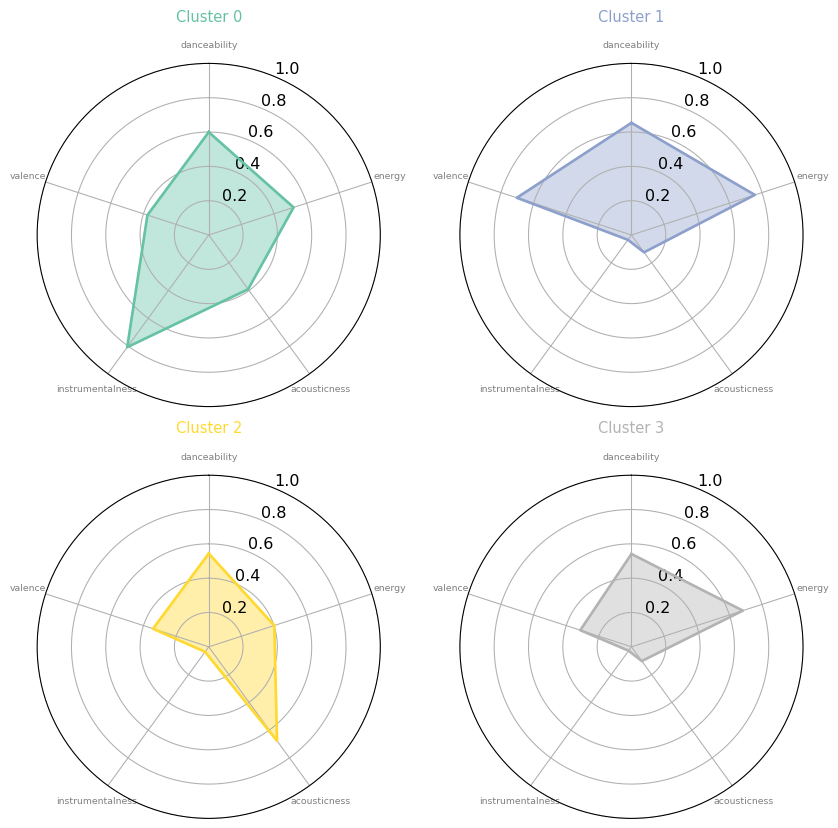

In [39]:
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

my_palette = plt.cm.get_cmap("Set2", len(cluster_stats_scaled.index))

for row in range(0, len(cluster_stats_scaled.index)):
    make_spider(row=row, title='Cluster {}'.format(row), color=my_palette(row))

### Creating a playlist for each cluster

In [40]:
def split_list(alist, wanted_parts=1):
    length = len(alist)
    return [ alist[i*length // wanted_parts: (i+1)*length // wanted_parts] 
             for i in range(wanted_parts) ]

In [41]:
def create_cluster_playlist(df, user_id, token):
    
    
    
    for cluster in df['k_cluster'].value_counts().index.tolist():
        uris = df[df.k_cluster == cluster]['uri'].tolist()
        list_of_uris = []
        
        if len(uris) > 100:
            list_of_uris = split_list(uris, 5)
        else:
            list_of_uris = split_list(uris, 1)
        
        ##Create playlist
        create_playlist_endpoint = f"https://api.spotify.com/v1/users/{user_id}/playlists"
        request_body_playlist = json.dumps({
            "name": f"Cluster {cluster} Playlist",
            "description": f"This is the playlist of the cluster number {cluster}, created with k-means algo",
            "public": True
        })
        h={
            "Content-Type": "application/json",
            "Authorization": "Bearer {}".format(token)
            
        }
        ## Make the post to create the playlist
        response = requests.post(url=create_playlist_endpoint, data=request_body_playlist, headers=h)
        
        if response.status_code == 201:
            print("La playlist del cluster {} fue correctamente creada".format(cluster))
        else:
            print("Hubo un error en la creacion de la playlist del cluster {}".format(cluster))
            print(str(response.status_code) + response.text)
            
            continue
        playlist_id = response.json()['id']
        print("Agregando canciones a la playlist")
        ## Parameters for the other request
        for uri in list_of_uris:
            
        
            
            add_track_endpoint = f"https://api.spotify.com/v1/playlists/{playlist_id}/tracks"
        
            request_add_tracks = json.dumps({
                "uris": uri
            })
        
            response = requests.post(url=add_track_endpoint, data=request_add_tracks, headers=h)
        
            if response.status_code == 201:
                print(f"Se agregaron {len(uri)} canciones a la playlist")
            else:
                print(f"Error al agregar canciones a la playlist")
                print(str(response.status_code) + response.text)
                print(len(uri))
                continue
        
    
    
    print("Finalizada la creacion de las playlist")
        
        

In [43]:

create_cluster_playlist(df_cluster, user_id, credentials.auth)

La playlist del cluster 1 fue correctamente creada
Agregando canciones a la playlist
Se agregaron 65 canciones a la playlist
Se agregaron 65 canciones a la playlist
Se agregaron 66 canciones a la playlist
Se agregaron 65 canciones a la playlist
Se agregaron 66 canciones a la playlist
La playlist del cluster 3 fue correctamente creada
Agregando canciones a la playlist
Se agregaron 56 canciones a la playlist
Se agregaron 57 canciones a la playlist
Se agregaron 57 canciones a la playlist
Se agregaron 57 canciones a la playlist
Se agregaron 57 canciones a la playlist
La playlist del cluster 2 fue correctamente creada
Agregando canciones a la playlist
Se agregaron 32 canciones a la playlist
Se agregaron 33 canciones a la playlist
Se agregaron 32 canciones a la playlist
Se agregaron 33 canciones a la playlist
Se agregaron 33 canciones a la playlist
La playlist del cluster 0 fue correctamente creada
Agregando canciones a la playlist
Se agregaron 20 canciones a la playlist
Se agregaron 21 canc